In [8]:
# Prolog - Auto Generated #
import os, uuid, matplotlib
%matplotlib inline
import matplotlib.pyplot
import pandas
pandas.options.mode.chained_assignment = None
import sys
sys.tracebacklimit = 0

# This dataset includes BIW, WD6, WD17, WD20 for 8 week period
orig_dataset = pandas.read_csv('input_df.csv')
print(orig_dataset.shape)

(55533, 7)


C:\Users\lali\AppData\Local\Temp\ipykernel_5328\3460069100.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(new_list)


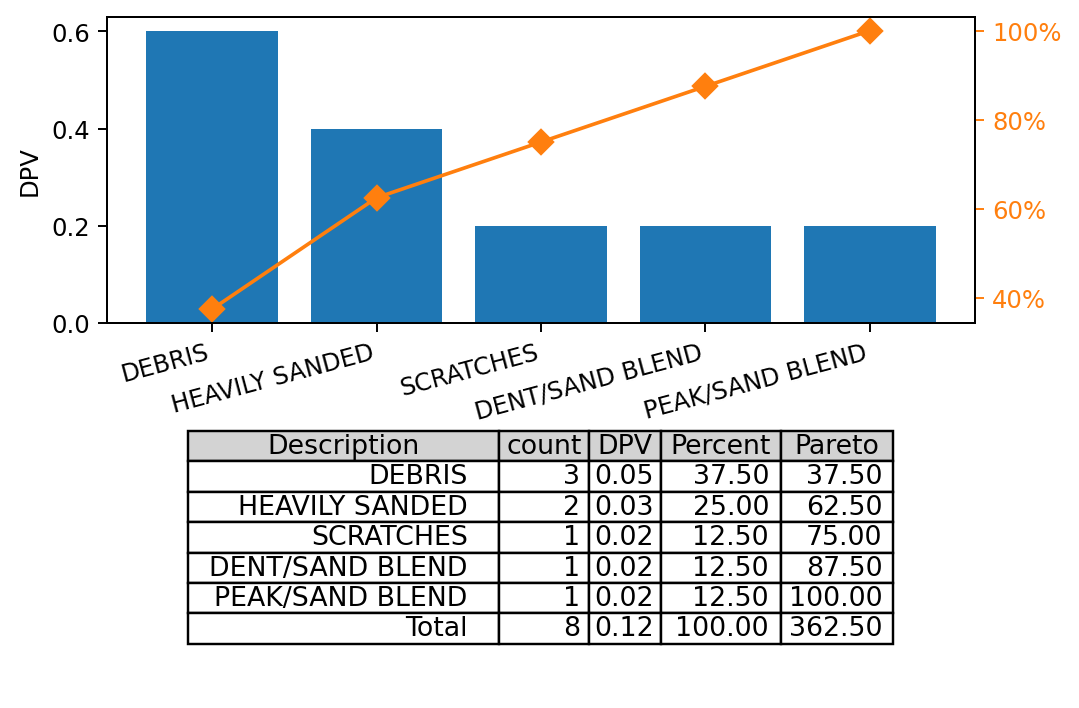

In [9]:
# BIW Daily Pareto and Chart

# Pareto and DPV chart from daily dashboards
dataset = orig_dataset.copy()
if(dataset.shape[0] > 0):
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.date
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_date = dataset['date'].value_counts().sort_index().index[latest_index]
    dataset = dataset[dataset['date'] == latest_date]

# Data pre-processing 
dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset = dataset.astype({'X Coordinate':'int'})
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])

# Rfid count from no. of production vehicles
rfid_count = dataset[dataset['Linking Workstation'] == 'PR_I']['Rfid'].nunique()
# Remove PR_I defects from dataset
dataset = dataset[dataset['Linking Workstation'] != "PR_I"]

fig, ax = matplotlib.pyplot.subplots(2, 1)

# Pareto chart
ax2 = matplotlib.pyplot.subplot(2, 1, 1)
# Count, dpv of each defect type
d_bar = dataset['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
d_bar['DPV'] = d_bar['count'] / dataset['Rfid'].nunique()
d_bar['Percent'] = d_bar['count'] / d_bar['count'].sum() * 100
d_bar['Pareto'] = d_bar['Percent'].cumsum()

# Show 5 defects, or fewer if not available
num_show = min(5, d_bar['Description'].shape[0])
d_bar = d_bar.head(num_show)
nums = [i + 1 for i in range(num_show)]

# Bar graph
ax2.bar(nums, d_bar['DPV'])
# Build list of x-ticks
new_list = ["Empty"] 
for d in d_bar['Description']:
    new_list.append(d)
ax2.set_xticklabels(new_list)
ax2.set_ylabel("DPV")
# Orange pareto line
ax3 = ax2.twinx()
ax3.plot(nums, d_bar['Pareto'], color="C1", marker="D", ms=7)
ax3.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())
ax3.tick_params(axis="y", colors="C1")
# If no data, show "No Data available"
if(d_bar.shape[0] == 0):
    ax.set_frame_on(False)
    ax2.set_frame_on(False)
    ax3.set_frame_on(False)
    ax2.set_title("No data available")
    ax2.axis('off')
matplotlib.pyplot.setp(ax2.get_xticklabels(), rotation=15, horizontalalignment='right')


ax = matplotlib.pyplot.subplot(2, 1, 2)

#Count, dpv for each defect type
d2 = dataset['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
d2['DPV'] = d2['count'] / rfid_count
d2['Percent'] = d2['count'] / d2['count'].sum() * 100
d2['Pareto'] = d2['Percent'].cumsum()
# Show top 12 defects and add total row
d2 = d2.head(12)
d2.loc['Total'] = d2.sum(numeric_only=True)
row  = d2.loc["Total"]
row['Description'] = "Total"
d2.loc["Total"] = row
# Show 2 decimal points of precision
d2.update(d2[['Pareto']].applymap('{:,.2f}'.format))
d2.update(d2[['DPV']].applymap('{:,.2f}'.format))
d2.update(d2[['Percent']].applymap('{:,.2f}'.format))

d2['count'] = d2['count'].astype(int)
# If there are defects to show, plot table
if(d2.shape[0] > 0):
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=d2.values, colLabels=d2.columns, loc='center', colColours=['lightgrey' for i in range(5)])
    # ax.title.set_text(dataset['Graphical Code Loc Desc'].value_counts().index[0])
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(d2.columns))))
    table.set_fontsize(11)

fig.set_figheight(5)
fig.set_dpi(175)
# fig.show()

# matplotlib.pyplot.tight_layout(pad=0, w_pad=0, h_pad=0)

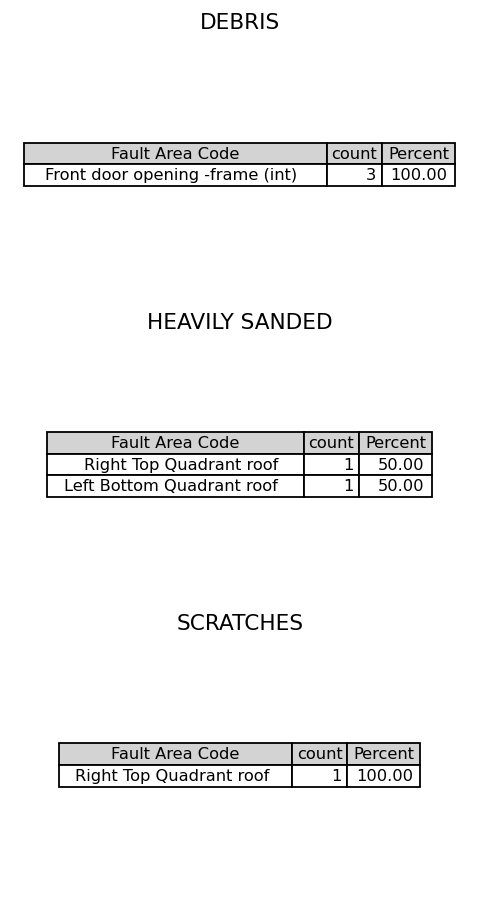

In [10]:
# Daily defect type breakdown

dataset = orig_dataset.copy()

if(dataset.shape[0] > 0):
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.date
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_date = dataset['date'].value_counts().sort_index().index[latest_index]
    dataset = dataset[dataset['date'] == latest_date]

import seaborn as sns

name_dict = {"B640": "Passenger side nose", "B632": "Pass. side front door (top ext)", "B654": "Right recharge lid (ext)", "B616": "Right Bottom Quadrant roof", "B628": "Driver tail end", "B661": "Bottom driver's b-pillar", "B615": "Right Top Quadrant roof", "B657": "Rear driver door opening  (int)", "B641": "Passenger side tail", "B627": "Driver side C pillar", "B618": "(Top) Right Side Lid (ext)", "B636": "Pass. side rear door (top ext)", "B638": "Pass. side rear door (bottom ext)", "B620": "(Top) Left Side Lid (int)", "B614": "Left Bottom Quadrant roof", "B658": "Front passenger door opening  (int)", "B613": "Left Top Quadrant roof", "B662": "Top passenger b-pillar", "B621": "Driver side nose", "B612": "Left Side hood (int)", "B707": "Right mid roof", "B660": "Top driver's b-pillar", "B659": "Rear passenger door opening  (int)", "B623": "Driver side door (top;ext)", "B629": "Driver side rear door (top ext)", "B644": "Rear passenger side trunk (ext)", "B691": "Left rear side", "B692": "Right rear side", "B655": "Front door opening -frame (int)", "B611": "Right Side hood (int)", "B634": "Pass. side front door (bot ext)", "B619": "(Top) Right Side Lid (int)", "B610": "Right Side hood (ext)", "B609": "Left Side hood (ext)", "B663": "Bottom passenger b-pillar", "B705": "Left mid roof", "B704": "Right Cpillar, A-pillar, mid roof", "B633": "Pass. side front door (top int)", "B714": "Left C pillar", "B639": "Pass. side rear door (bottom int)", "B642": "Rear driver side trunk (ext)", "B637": "Pass. side rear door (top int)", "B617": "(Top) Left Side Lid (ext)", "B708": "Right A-pillar", "B624": "Driver side door (bottom;ext)", "B706": "Left A pillar", "B631": "Driver side rear door (bottom ext)", "B700": "Right side top lid", "B699": "Left side top lid", "B695": "Driver side rear door (top int)", "B759": "V536 RIGHT SIDE HOOD", "B747": "V536 LEFT FRONT DOOR PANEL", "B778": "V536 LEFT NOSE", "B748": "V536 LEFT REAR DOOR PANEL", "B741": "V536 RIGHT FRONT DOOR THRESHOLD", "B728": "V536 RIGHT B PILLAR INTERIOR TOP", "B742": "V536 RIGHT REAR DOOR THRESHOLD", "B757": "V536 RIGHT REAR TRUNK PANEL", "B783": "Tail Gate", "B746": "V536 RIGHT REAR QUARTER PANEL", "B743": "V536 LEFT REAR DOOR THRESHOLD", "B753": "V536 RIGHT FRONT DOOR PANEL", "B731": "V536 LEFT B PILLAR INTERIOR TOP", "B754": "V536 RIGHT REAR DOOR PANEL", "B758": "V536 RIGHT REAR TRUNK WINDOW PANEL", "B653": "Right recharge lid (int)", "B755": "V536 RIGHT FRONT DOOR WINDOW PANEL", "B750": "V536 LEFT REAR DOOR WINDOW PANEL", "B751": "V536 LEFT REAR TRUNK WINDOW PANEL", "B779": "V536 RIGHT NOSE"}

dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset = dataset.astype({'X Coordinate':'int'})
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
d1 = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])

rfid_count = dataset[dataset['Linking Workstation'] == "PR_I"]['Rfid'].nunique()
d1 = dataset[dataset['Linking Workstation'] != "PR_I"]

fig, ax = matplotlib.pyplot.subplots(3, 1)
fig.set_figwidth(4.5)
fig.set_figheight(8.5)
fig.set_dpi(130)

#Most common: 
for i in range(3):
    ax = matplotlib.pyplot.subplot(3, 1, i+1)
    if(d1['Graphical Code Loc Desc'].value_counts().shape[0] > i):
        d3 = d1.loc[d1['Graphical Code Loc Desc'] == d1['Graphical Code Loc Desc'].value_counts().index[i]]
        d2 = d3['Fault Area Code'].value_counts().rename_axis('Fault Area Code').reset_index(name='count')
        d2['Percent'] = d2['count'] / d2['count'].sum() * 100
        d2.update(d2[['Percent']].applymap('{:,.2f}'.format))
        d2['Fault Area Code'] = d2['Fault Area Code'].map(name_dict)
        # d2.loc['Total'] = d2.sum(numeric_only=True)
        num_show = min(d2.shape[0], 8)
        d2 = d2.head(num_show)
        if(num_show > 0):
            ax.axis('off')
            ax.axis('tight')
            table = ax.table(cellText=d2.values, colLabels=d2.columns, loc='center', colColours=['lightgrey' for i in range(5)])
            ax.title.set_text(d1['Graphical Code Loc Desc'].value_counts().index[i])
            table.set_fontsize(9)
            table.auto_set_column_width(col=list(range(len(d2.columns))))
        else:
            temp_string = "No data available"
        # print(time_string)
            matplotlib.pyplot.text(0.2, 0.5, temp_string, size=16)
            matplotlib.pyplot.axis('off')
    else:
        temp_string = "No data available"
        # print(time_string)
        matplotlib.pyplot.text(0.2, 0.5, temp_string, size=16)
        matplotlib.pyplot.axis('off')



222.99999999999997


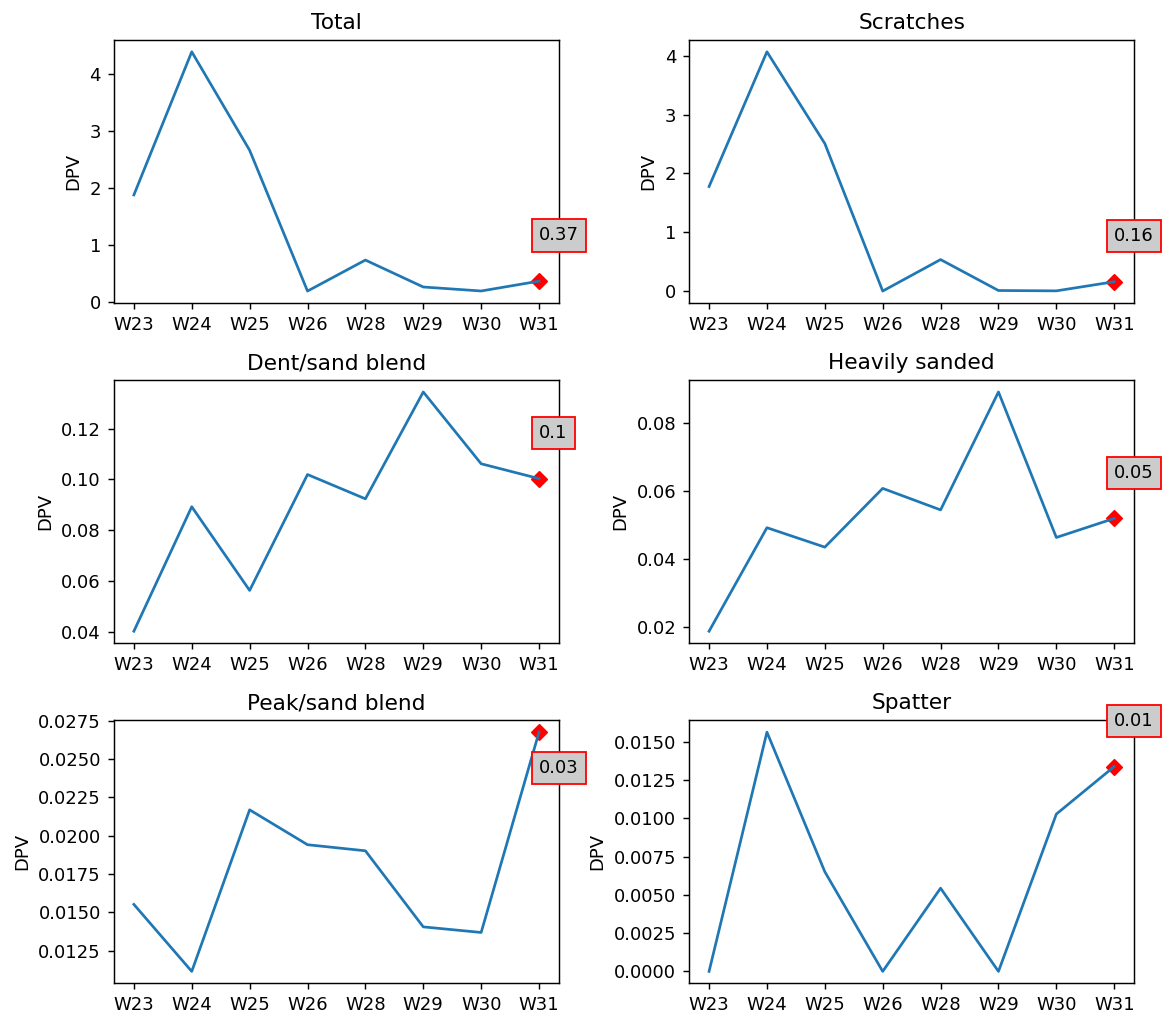

In [12]:
# Weekly Trends for WD20

dataset = orig_dataset.copy()

dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset = dataset.astype({'X Coordinate':'int'})
dataset['X Coordinate'] = dataset['X Coordinate'] - 7
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Y Coordinate'] = 525 - dataset['Y Coordinate']
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])

import urllib
import seaborn as sns
import matplotlib.image as mpimg
weeks = 12
plots = 6
# Filter for latest week
datasets = []
labels = []
rfid_counts = []

if(dataset.shape[0] > 0):
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.isocalendar().week
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_week = dataset['date'].value_counts().sort_index().index[latest_index]
    # print(latest_week)
    for week in range(weeks + 1):
        if(dataset[dataset['date'] == latest_week - week].shape[0] > 0):
            week_temp = dataset[dataset['date'] == latest_week - week]
            rfid_c = week_temp[week_temp['Linking Workstation'] == 'PR_I']['Rfid'].nunique()
            rfid_counts.append(rfid_c)
            options = ['BIW_H', 'BIW 1', 'BIW_I']
            datasets.append(week_temp[week_temp['Linking Workstation'].isin(options)])
            # datasets.append(week_temp[week_temp['Linking Workstation'] != 'PR_I'])
            labels.append("W" + str(latest_week - week))

labels.reverse()
datasets.reverse()
rfid_counts.reverse()
last = len(datasets) - 1

total_plots = min(plots, dataset['Graphical Code Loc Desc'].value_counts().shape[0])
if total_plots % 2 == 1:
    total_plots  -= 1

fig, ax = matplotlib.pyplot.subplots(total_plots//2, 2)
fig.set_figwidth(9)
fig.set_figheight(8)
fig.set_dpi(130)
counter = 0

#Total
ax = matplotlib.pyplot.subplot(total_plots//2, 2, 1)
dpv = []
# Dpv for each dataset
for j in range(len(datasets)):
    # print(j)
    ds = datasets[j]
    defects = ds.shape[0]
    # print(defects)
    vehicles = rfid_counts[j]
    # print(vehicles)
    if(vehicles > 0 and defects > 0):
        dpv.append(defects / vehicles)
    else:
        dpv.append(0)
ax.plot(labels, dpv)
this_week = len(labels) - 1
print(dpv[this_week] * rfid_counts[this_week])
ax.scatter(labels[this_week], dpv[this_week], c='red', marker='D')
if(dpv[this_week] == max(dpv)):
        text_offset = -0.17 * (max(dpv) - min(dpv))
else:
    text_offset = 0.17 * (max(dpv) - min(dpv))
ax.annotate(str(round(dpv[this_week], 2)), (labels[this_week], dpv[this_week] + text_offset), bbox=dict(fc= "0.8",color = 'red'))
ax.set_ylabel("DPV")
ax.set_title("Total")

#Next most common
for i in range(1, total_plots):
    ax = matplotlib.pyplot.subplot(total_plots//2, 2, i+1)
    # Pick most common description type in most recent week
    this_desc = datasets[last]['Graphical Code Loc Desc'].value_counts().index[counter]
    while len(this_desc) < 2:
        counter += 1
        this_desc = datasets[last]['Graphical Code Loc Desc'].value_counts().index[counter]
    counter += 1
    dpv = []
    
    # Dpv for each dataset
    for j in range(len(datasets)):
        ds = datasets[j]
        defects = ds.loc[ds['Graphical Code Loc Desc'] == this_desc].shape[0]
        vehicles = rfid_counts[j]
        if(vehicles > 0 and defects > 0):
            dpv.append(defects / vehicles)
        else:
            dpv.append(0)

    ax.plot(labels, dpv)
    this_week = len(labels) - 1
    ax.scatter(labels[this_week], dpv[this_week], c='red', marker='D')
    if(dpv[this_week] == max(dpv)):
        text_offset = -0.17 * (max(dpv) - min(dpv))
    else:
        text_offset = 0.17 * (max(dpv) - min(dpv))
    ax.annotate(str(round(dpv[this_week], 2)), (labels[this_week], dpv[this_week] + text_offset), bbox=dict(fc= "0.8",color = 'red'))
    ax.set_ylabel("DPV")
    ax.set_title(this_desc.lower().capitalize())

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

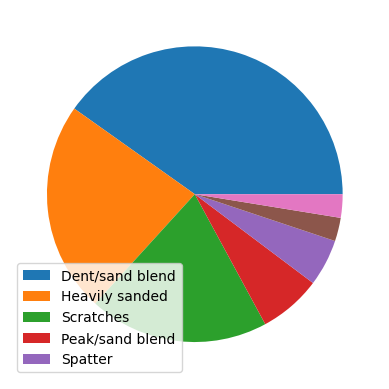

In [21]:
# BIW monthly pie chart

if(dataset.shape[0] > 0):
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.month
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_week = dataset['date'].value_counts().sort_index().index[latest_index]
    dataset = dataset[dataset['date'] == latest_week]
dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset = dataset.astype({'X Coordinate':'int'})
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])


rfid_count = dataset[dataset['Linking Workstation'] == "PR_I"]['Rfid'].nunique()
options = ['BIW_H', 'BIW 1', 'BIW_I']
dataset = dataset[dataset['Linking Workstation'].isin(options)]

d2 = dataset['Graphical Code Loc Desc'].value_counts().rename_axis('Description').reset_index(name='count')
d2['Description'] = d2['Description'].str.lower().str.capitalize()
d2 = d2.head(10)
matplotlib.pyplot.pie(d2['count'])
matplotlib.pyplot.legend(d2['Description'].head(5),
          loc="lower left")


DENT/SAND BLEND
HEAVILY SANDED
SCRATCHES
PEAK/SAND BLEND
SPATTER
MISC. DEFECT


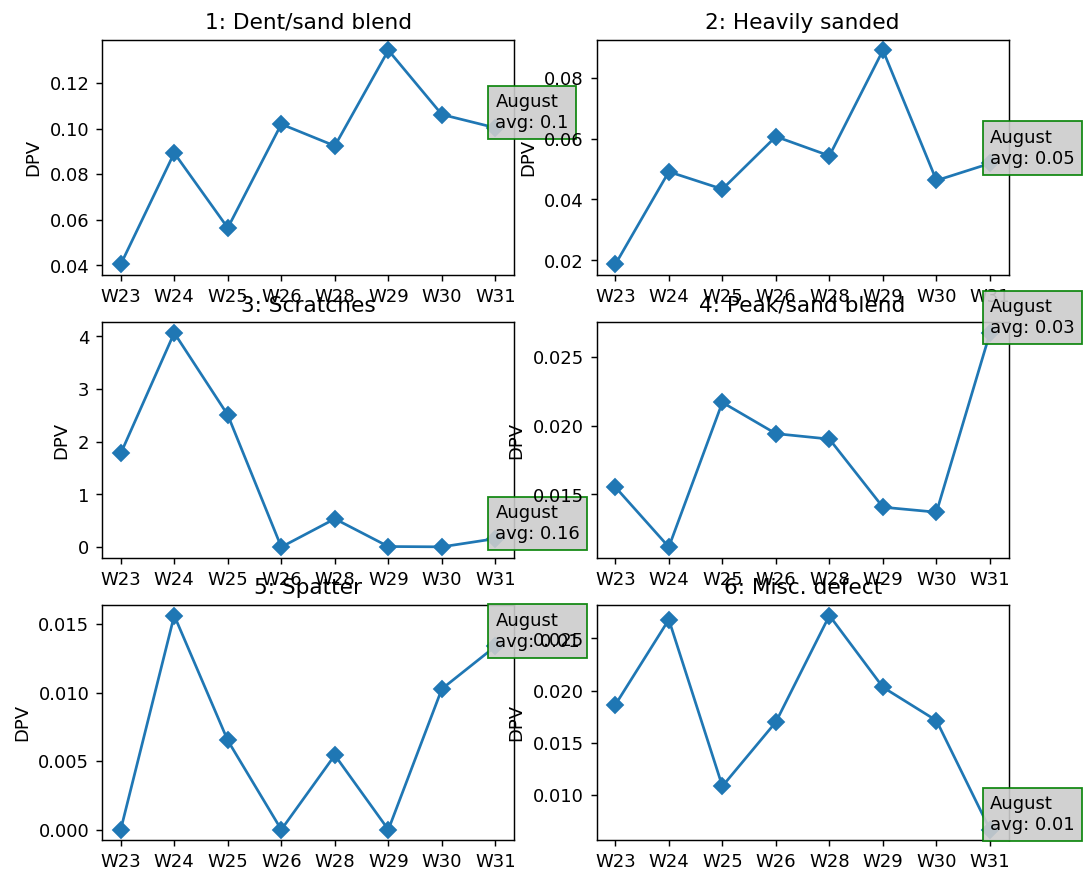

In [22]:
# BIW Weekly Trends with month mean line

dataset = orig_dataset.copy()

# Drop NA's 
dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
# Adjust X and Y Coordinate
dataset = dataset.astype({'X Coordinate':'int'})
dataset['X Coordinate'] = dataset['X Coordinate'] - 7
dataset = dataset.astype({'Y Coordinate':'int'})
dataset['Y Coordinate'] = 525 - dataset['Y Coordinate']
# Fault Area codes are B627 B627B627 so take first 4 characters
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]

dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp', 'X Coordinate', 'Y Coordinate'])

# Month_temp is used for month mean line only
if(dataset.shape[0] > 0):
    # Creates a new column with the month
    dataset['month'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.month
    # latest_index 
    latest_index = dataset['month'].value_counts().shape[0] - 1
    latest_month = dataset['month'].value_counts().sort_index().index[latest_index]
    month_temp = dataset[dataset['month'] == latest_month]
    # options = ['TCI_N', 'TCI_S']
    month_temp = month_temp[month_temp['Linking Workstation'].isin(options)]
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}



weeks = 12
plots = 6
mean_color = 'green'
# Filter for latest week
datasets = []
labels = []
rfid_counts = []

# 
if(dataset.shape[0] > 0):
    
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.isocalendar().week
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_week = dataset['date'].value_counts().sort_index().index[latest_index]
    # print(latest_week)
    for week in range(weeks + 1):
        if(dataset[dataset['date'] == latest_week - week].shape[0] > 0):
            week_temp = dataset[dataset['date'] == latest_week - week]

            rfid_c = week_temp[week_temp['Linking Workstation'] == 'PR_I']['Rfid'].nunique()
            rfid_counts.append(rfid_c)
            # options = ['WD6', 'EC_I']
            datasets.append(week_temp[week_temp['Linking Workstation'].isin(options)])
            # datasets.append(week_temp)
            labels.append("W" + str(latest_week - week))

labels.reverse()
datasets.reverse()
rfid_counts.reverse()
last = len(datasets) - 1

# datasets = [W25, W26, W27, W28]

# 
total_plots = min(plots, dataset['Graphical Code Loc Desc'].value_counts().shape[0])
if total_plots % 2 == 1:
    total_plots  -= 1
# print(total_plots)
fig, ax = matplotlib.pyplot.subplots(total_plots//2, 2)
fig.set_figwidth(9)
fig.set_figheight(8)
fig.set_dpi(130)
counter = 0

# Most common
for i in range(total_plots):
    ax = matplotlib.pyplot.subplot(total_plots//2, 2, i+1)

    # Pick most common description type in most recent week
    this_desc = month_temp['Graphical Code Loc Desc'].value_counts().index[counter]
    print(this_desc)
    while len(this_desc) < 2:
        counter += 1
        this_desc = month_temp['Graphical Code Loc Desc'].value_counts().index[counter]
    counter += 1
    
    dpv = []
    total_defects = 0
    total_veh = 0
    total_labels = []
    # Dpv for each dataset
    for j in range(len(datasets)):
        # print(j)
        ds = datasets[j]
        defects = ds.loc[ds['Graphical Code Loc Desc'] == this_desc].shape[0]
        if(ds[ds['month'] == latest_month].shape[0] > 0):
            # print(ds['month'].value_counts())
            total_defects += defects
            total_veh += rfid_counts[j]
            total_labels.append(labels[j])
        # print(defects)
        vehicles = rfid_counts[j]
        # print(vehicles)
        if(vehicles > 0 and defects > 0):
            dpv.append(defects / vehicles)
        else:
            dpv.append(0)

    ax.plot(labels, dpv, marker='D')
    #Calculated total dpv mean (weighted by vehicles count)
    
    weighted_mean = total_defects / total_veh
    y_mean = [weighted_mean]*len(total_labels)
    
    mean_line = ax.plot(total_labels,y_mean, label='Mean', linestyle='--', alpha=0.3, color=mean_color)
    
    this_week = len(labels) - 1
    # ax.scatter(labels[this_week], dpv[this_week], c='red', marker='D')
    if(dpv[this_week] == max(dpv)):
        text_offset = -0.17 * (max(dpv) - min(dpv))
    elif(dpv[this_week] > 0.05):
        text_offset = 0.17 * (max(dpv) - min(dpv))
    else:
        text_offset = 0
    # ax.text(labels[this_week - 1], dpv[this_week] + text_offset, s = str(round(dpv[this_week], 2)))
    ax.annotate(str(month_dict[latest_month]) + "\navg: " + str(round(y_mean[0], 2)), (labels[this_week], weighted_mean), bbox=dict(fc= "0.8", alpha=0.9, color=mean_color))
    ax.set_ylabel("DPV")
    ax.set_title(str(i + 1) + ": " + this_desc.lower().capitalize())


37
37


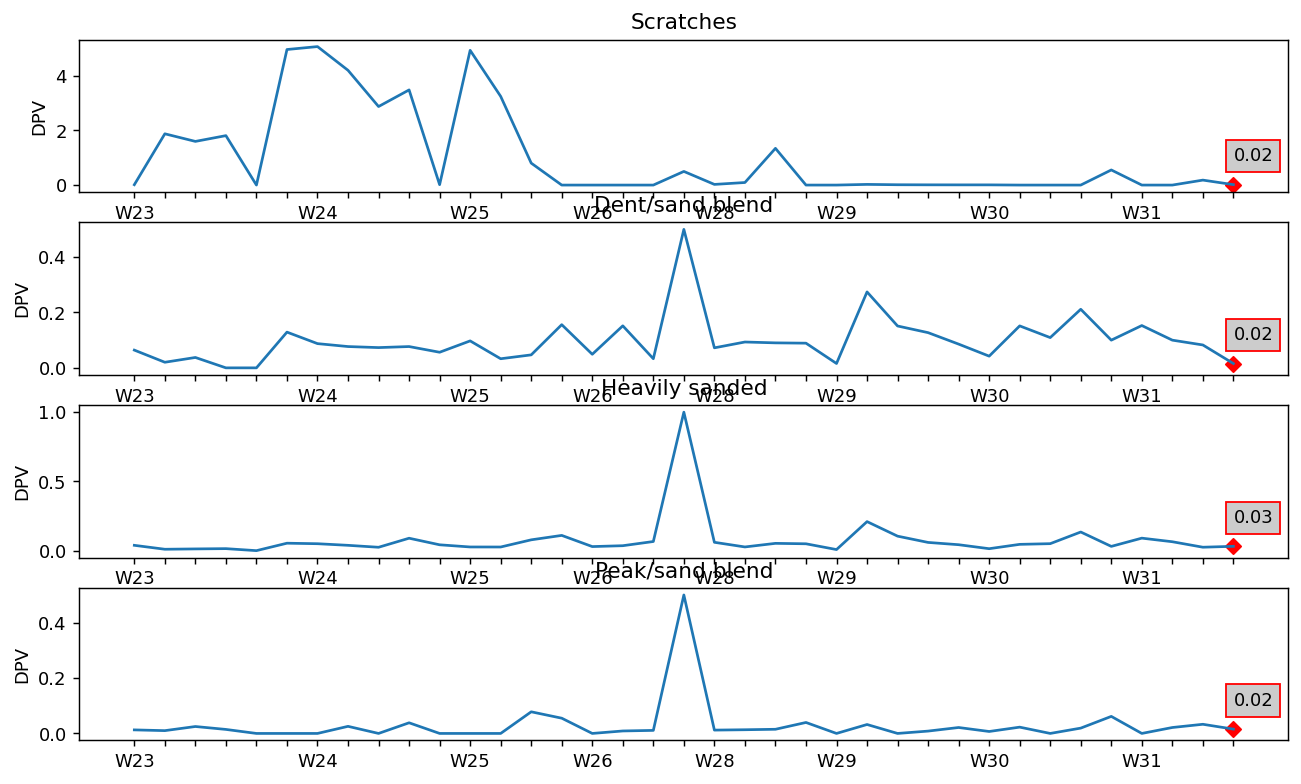

In [23]:
# BIW Stacked trends chart
dataset = dataset.dropna()
dataset = dataset[dataset['Fault Area Code'].notna()]
dataset['Fault Area Code'] = dataset['Fault Area Code'].str[0:4]
dataset = dataset.drop_duplicates(subset = ['Fault Area Code', 'Graphical Code Loc Desc', 'Rfid', 'Link Timestamp'])

import urllib
import seaborn as sns
import matplotlib.image as mpimg
days = 60
plots = 4
# Filter for latest week
datasets = []
labels = []
labels2 = []
rfid_counts = []

if(dataset.shape[0] > 0):
    dataset['week_num'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.isocalendar().week
    dataset['iso_day_num'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.isocalendar().day
    # dataset['week_str'] = "W" + str(dataset['week_num'])
    dataset['date'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.dayofyear
    dataset['year'] = pandas.to_datetime(dataset['Link Timestamp'], format = '%Y-%m-%dT%H:%M:%S.%f').dt.year
    dataset['date'] = dataset['year'] * 1000 + dataset['date']
    dates = list(dataset['date'].value_counts().sort_index().index)
    dates.reverse()
    latest_index = dataset['date'].value_counts().shape[0] - 1
    latest_day = dataset['date'].value_counts().sort_index().index[latest_index]
    # print(latest_week)
    for day in dates:
        if(dataset[dataset['date'] == day].shape[0] > 0):
            day_temp = dataset[dataset['date'] == day]
            rfid_c = day_temp[day_temp['Linking Workstation'] == 'PR_I']['Rfid'].nunique()
            rfid_counts.append(rfid_c)
            options = ['BIW 1', 'BIW_H', 'BIW_I']
            datasets.append(day_temp[day_temp['Linking Workstation'].isin(options)])
            labels.append(str(day))
            labels2.append(day_temp['week_num'].mode()[0])

labels.reverse()
labels2.reverse()
datasets.reverse()
rfid_counts.reverse()
last = len(datasets) - 1

print(len(labels))
print(len(labels2))

# for dataset in datasets:
#     print(dataset.shape)

total_plots = min(plots, dataset['Graphical Code Loc Desc'].value_counts().shape[0] + 1)
# if total_plots % 2 == 1:
#     total_plots  -= 1
# print(total_plots)
fig, ax = matplotlib.pyplot.subplots(total_plots, 1)
fig.set_figwidth(12)
fig.set_figheight(7)
fig.set_dpi(130)
counter = 0

temp = labels2[0]
current = labels2[0]
for i in range(len(labels2)):
    temp = labels2[i]
    if(temp == current):
        labels2[i] = current
    else:
        labels2[i] = current
        current = temp

# 
div = len(labels2) // 30
if (div > 1):
    labels3 = [""]
    for i in range(1, len(labels2)):
        if(i % div == 0):
            labels3.append("W" + str(labels2[i]))
        else:
            labels3.append("")
else:
    temp = labels2[0]
    current = ""  
    for i in range(len(labels2)):
        temp = labels2[i]
        if(temp == current):
            labels2[i] = ""
        else:
            current = temp
            labels2[i] = "W" + str(current)
    labels3 = labels2

# Use top 4 defects from last 10% of dataset 
dataset = dataset[dataset['Linking Workstation'] != 'PR_I'].tail(dataset.shape[0] // 10)

#Next most common
for i in range(total_plots):
    ax = matplotlib.pyplot.subplot(total_plots, 1, i+1)

    # Pick most common description type in most recent week
    this_desc = dataset['Graphical Code Loc Desc'].value_counts().index[counter]
    while len(this_desc) < 2:
        counter += 1
        this_desc = dataset['Graphical Code Loc Desc'].value_counts().index[counter]
    counter += 1
    dpv = []
    # Dpv for each dataset
    for j in range(len(datasets)):
        # print(j)
        ds = datasets[j]
        defects = ds.loc[ds['Graphical Code Loc Desc'] == this_desc].shape[0]
        # print(defects)
        vehicles = rfid_counts[j]
        # print(vehicles)
        if(vehicles > 0 and defects > 0):
            dpv.append(defects / vehicles)
        else:
            dpv.append(0)
    # dpv.reverse()
    # print(dpv)
    # labels = ["3w", "2w", "1w", ""]
    # labels = []
    # for i in range(weeks, -1, -1):
    #     labels.append("W" + str(latest_week - i))
    # print(dpv)
    ax.plot(labels, dpv)
    this_week = len(labels) - 1
    ax.scatter(labels[this_week], dpv[this_week], c='red', marker='D')
    if(dpv[this_week] == max(dpv)):
        text_offset = -0.17 * (max(dpv) - min(dpv))
    else:
        text_offset = 0.17 * (max(dpv) - min(dpv))
    ax.annotate(str(round(dpv[this_week], 2)), (labels[this_week], dpv[this_week] + text_offset), bbox=dict(fc= "0.8",color = 'red'))
    ax.set_ylabel("DPV")
    ax.set_title(this_desc.lower().capitalize())
    matplotlib.pyplot.xticks(ticks = labels, labels=labels3)
